### Google Colab

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
%cd "/content/drive/MyDrive/4_ING_INFORMATICA/tfg/tfg/experiments/taming_transformers/taming-transformers/"

UsageError: Line magic function `%` not found.


In [ ]:
% % capture
% pip install omegaconf >= 2.0.0 pytorch-lightning >= 1.0.8 einops >= 0.3.0

### NGPU server

In [1]:
%cd "/mnt/homeGPU1/pbedmar/pycharm/experiments/taming_transformers/taming-transformers/"

/mnt/homeGPU1/pbedmar/pycharm/experiments/taming_transformers/taming-transformers


In [2]:
import sys
import os
import torch
from functions import *

sys.path.append(".")
torch.set_grad_enabled(False)

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

models = []
titles = []

/mnt/homeGPU1/pbedmar/pbedmar.tfg.taming.train/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


#### Functions to load and preprocess models

In [3]:
torch.manual_seed(1)

#### Load trained models

Modelos originales, entrenados sin data augmentation sobre las imágenes de moléculas

In [ ]:
#titles=["Input", "VQGAN - 192x192 - 8ep", "VQGAN - 192x192 - 16ep", "VQGAN - 192x192 - 32ep", "VQGAN aug - 192x192 - 40ep", "VQGAN aug - 192x192 - 70ep", "VQGAN aug - 192x192 - 100ep", "VQGAN aug - 192x192 - 150ep", "VQGAN aug - 192x192 - 200ep", "VQGAN aug - 192x192 - 300ep"]
#models = []

#config_8ep = load_config("logs/2022-03-10T13-17-06_custom_vqgan/configs/2022-03-10T13-17-06-project.yaml", display=False)
#model_8ep = load_vqgan(config_8ep, ckpt_path="logs/2022-03-10T13-17-06_custom_vqgan/checkpoints/last.ckpt").to(DEVICE)
#models.append(model_8ep)

#config_16ep = load_config("logs/2022-03-13T12-11-25_custom_vqgan/configs/2022-03-13T12-11-25-project.yaml", display=False)
#model_16ep = load_vqgan(config_16ep, ckpt_path="logs/2022-03-13T12-11-25_custom_vqgan/checkpoints/last.ckpt").to(DEVICE)
#models.append(model_16ep)

#config_32ep = load_config("logs/2022-03-13T12-44-33_custom_vqgan/configs/2022-03-13T12-44-33-project.yaml", display=False)
#model_32ep = load_vqgan(config_32ep, ckpt_path="logs/2022-03-13T12-44-33_custom_vqgan/checkpoints/last.ckpt").to(DEVICE)
#models.append(model_32ep)

Modelos entrenados con imagenes de moleculas aumentadas, utilizando la primera versión de data augmentation (aug), triplicando el tamaño del dataset.

In [4]:
project_path = "experiments/taming_transformers/taming-transformers/"
models = []

titles = ["Input", "VQGAN aug - 192x192 - 40ep", "VQGAN aug - 192x192 - 70ep", "VQGAN aug - 192x192 - 100ep",
          "VQGAN aug - 192x192 - 150ep", "VQGAN aug - 192x192 - 200ep", "VQGAN aug - 192x192 - 300ep",
          "VQGAN aug - 192x192 - 400ep", "VQGAN aug - 192x192 - 500ep"]


config_aug_40ep = load_config("logs/2022-03-14T08-43-25_custom_vqgan_aug/configs/2022-03-14T08-43-25-project.yaml",
                              display=False)
model_aug_40ep = load_vqgan(config_aug_40ep,
                            ckpt_path="logs/2022-03-14T08-43-25_custom_vqgan_aug/checkpoints/last.ckpt").to(DEVICE)
models.append(model_aug_40ep)

config_aug_70ep = load_config("logs/2022-03-15T19-39-05_custom_vqgan_aug/configs/2022-03-15T19-39-05-project.yaml",
                              display=False)
model_aug_70ep = load_vqgan(config_aug_70ep,
                            ckpt_path="logs/2022-03-15T19-39-05_custom_vqgan_aug/checkpoints/last.ckpt").to(DEVICE)
models.append(model_aug_70ep)

config_aug_100ep = load_config("logs/2022-03-24T00-27-34_custom_vqgan_aug/configs/2022-03-24T00-27-34-project.yaml",
                               display=False)
model_aug_100ep = load_vqgan(config_aug_100ep,
                             ckpt_path="logs/2022-03-24T00-27-34_custom_vqgan_aug/checkpoints/last.ckpt").to(DEVICE)
models.append(model_aug_100ep)

config_aug_150ep = load_config("logs/2022-03-24T06-37-39_custom_vqgan_aug/configs/2022-03-24T06-37-39-project.yaml",
                               display=False)
model_aug_150ep = load_vqgan(config_aug_150ep,
                             ckpt_path="logs/2022-03-24T06-37-39_custom_vqgan_aug/checkpoints/last.ckpt").to(DEVICE)
models.append(model_aug_150ep)

config_aug_200ep = load_config("logs/2022-03-23T21-38-37_custom_vqgan_aug/configs/2022-03-23T21-38-37-project.yaml",
                               display=False)
model_aug_200ep = load_vqgan(config_aug_200ep,
                             ckpt_path="logs/2022-03-23T21-38-37_custom_vqgan_aug/checkpoints/last.ckpt").to(DEVICE)
models.append(model_aug_200ep)

config_aug_300ep = load_config("logs/2022-03-24T01-44-05_custom_vqgan_aug/configs/2022-03-24T01-44-05-project.yaml",
                               display=False)
model_aug_300ep = load_vqgan(config_aug_300ep,
                             ckpt_path="logs/2022-03-24T01-44-05_custom_vqgan_aug/checkpoints/last.ckpt").to(DEVICE)
models.append(model_aug_300ep)

config_aug_400ep = load_config("logs/2022-03-26T14-25-50_custom_vqgan_aug/configs/2022-03-26T14-25-50-project.yaml",
                               display=False)
model_aug_400ep = load_vqgan(config_aug_400ep,
                             ckpt_path="logs/2022-03-26T14-25-50_custom_vqgan_aug/checkpoints/last.ckpt").to(DEVICE)
models.append(model_aug_400ep)

config_aug_500ep = load_config("logs/2022-03-26T14-26-01_custom_vqgan_aug/configs/2022-03-26T14-26-01-project.yaml",
                               display=False)
model_aug_500ep = load_vqgan(config_aug_500ep,
                             ckpt_path="logs/2022-03-26T14-26-01_custom_vqgan_aug/checkpoints/last.ckpt").to(DEVICE)
models.append(model_aug_500ep)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.


KeyboardInterrupt: 

Ahora utilizando la segunda versión de data augmentation (aug2), con más cambios en las imágenes que la anterior, triplicando el tamaño del dataset.

In [5]:
models2 = []
titles2 = ["Input", "VQGAN aug 2 - 192x192 - 40ep", "VQGAN aug 2 - 192x192 - 70ep", "VQGAN aug 2 - 192x192 - 75ep", "VQGAN aug 2 - 192x192 - 80ep", "VQGAN aug 2 - 192x192 - 85ep", "VQGAN aug 2 - 192x192 - 90ep", "VQGAN aug 2 - 192x192 - 95ep", "VQGAN aug 2 - 192x192 - 100ep", "VQGAN aug 2 - 192x192 - 150ep", "VQGAN aug 2 - 192x192 - 200ep", "VQGAN aug 2 - 192x192 - 300ep"]

config_aug2_40ep = load_config("logs/2022-03-24T14-47-40_custom_vqgan_aug_2/configs/2022-03-24T14-47-40-project.yaml", display=False)
model_aug2_40ep = load_vqgan(config_aug2_40ep, ckpt_path="logs/2022-03-24T14-47-40_custom_vqgan_aug_2/checkpoints/last.ckpt").to(DEVICE)
models2.append(model_aug2_40ep)

config_aug2_70ep = load_config("logs/2022-03-24T15-24-33_custom_vqgan_aug_2/configs/2022-03-24T15-24-33-project.yaml",display=False)
model_aug2_70ep = load_vqgan(config_aug2_70ep, ckpt_path="logs/2022-03-24T15-24-33_custom_vqgan_aug_2/checkpoints/last.ckpt").to(DEVICE)
models2.append(model_aug2_70ep)

config_aug2_75ep = load_config("logs/2022-04-19T21-41-35_custom_vqgan_aug_2/configs/2022-04-19T21-41-35-project.yaml",display=False)
model_aug2_75ep = load_vqgan(config_aug2_75ep, ckpt_path="logs/2022-04-19T21-41-35_custom_vqgan_aug_2/checkpoints/last.ckpt").to(DEVICE)
models2.append(model_aug2_75ep)

config_aug2_80ep = load_config("logs/2022-04-19T22-51-09_custom_vqgan_aug_2/configs/2022-04-19T22-51-09-project.yaml",display=False)
model_aug2_80ep = load_vqgan(config_aug2_80ep, ckpt_path="logs/2022-04-19T22-51-09_custom_vqgan_aug_2/checkpoints/last.ckpt").to(DEVICE)
models2.append(model_aug2_80ep)

config_aug2_85ep = load_config("logs/2022-04-20T00-05-09_custom_vqgan_aug_2/configs/2022-04-20T00-05-09-project.yaml",display=False)
model_aug2_85ep = load_vqgan(config_aug2_85ep, ckpt_path="logs/2022-04-20T00-05-09_custom_vqgan_aug_2/checkpoints/last.ckpt").to(DEVICE)
models2.append(model_aug2_85ep)

config_aug2_90ep = load_config("logs/2022-04-20T01-24-27_custom_vqgan_aug_2/configs/2022-04-20T01-24-27-project.yaml",display=False)
model_aug2_90ep = load_vqgan(config_aug2_90ep, ckpt_path="logs/2022-04-20T01-24-27_custom_vqgan_aug_2/checkpoints/last.ckpt").to(DEVICE)
models2.append(model_aug2_90ep)

config_aug2_95ep = load_config("logs/2022-04-20T02-36-05_custom_vqgan_aug_2/configs/2022-04-20T02-36-05-project.yaml",display=False)
model_aug2_95ep = load_vqgan(config_aug2_95ep, ckpt_path="logs/2022-04-20T02-36-05_custom_vqgan_aug_2/checkpoints/last.ckpt").to(DEVICE)
models2.append(model_aug2_95ep)

config_aug2_100ep = load_config("logs/2022-03-24T16-30-14_custom_vqgan_aug_2/configs/2022-03-24T16-30-14-project.yaml", display=False)
model_aug2_100ep = load_vqgan(config_aug2_100ep, ckpt_path="logs/2022-03-24T16-30-14_custom_vqgan_aug_2/checkpoints/last.ckpt").to(DEVICE)
models2.append(model_aug2_100ep)

config_aug2_150ep = load_config("logs/2022-03-24T22-59-22_custom_vqgan_aug_2/configs/2022-03-24T22-59-22-project.yaml", display=False)
model_aug2_150ep = load_vqgan(config_aug2_150ep, ckpt_path="logs/2022-03-24T22-59-22_custom_vqgan_aug_2/checkpoints/last.ckpt").to(DEVICE)
models2.append(model_aug2_150ep)

config_aug2_200ep = load_config("logs/2022-03-25T01-30-44_custom_vqgan_aug_2/configs/2022-03-25T01-30-44-project.yaml", display=False)
model_aug2_200ep = load_vqgan(config_aug2_200ep, ckpt_path="logs/2022-03-25T01-30-44_custom_vqgan_aug_2/checkpoints/last.ckpt").to(DEVICE)
models2.append(model_aug2_200ep)

config_aug2_300ep = load_config("logs/2022-03-25T05-09-50_custom_vqgan_aug_2/configs/2022-03-25T05-09-50-project.yaml", display=False)
model_aug2_300ep = load_vqgan(config_aug2_300ep, ckpt_path="logs/2022-03-25T05-09-50_custom_vqgan_aug_2/checkpoints/last.ckpt").to(DEVICE)
models2.append(model_aug2_300ep)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pr

Ahora utilizando la tercera versión de data augmentation (aug3), similar a aug2 pero con menos transformaciones que generen cambios de color en la imagen, triplicando el tamaño del dataset.


In [48]:
models3 = []
titles3 = ["Input", "VQGAN aug 3 - 192x192 - 70ep", "VQGAN aug 3 - 192x192 - 90ep", "VQGAN aug 3 - 192x192 - 110ep", "VQGAN aug 3 - 192x192 - 130ep", "VQGAN aug 3 - 192x192 - 150ep", "VQGAN aug 3 - 192x192 - 170ep"]

directory = "2022-03-29T23-24-34"
config_aug3_70ep = load_config("logs/"+directory+"_custom_vqgan_aug_3/configs/"+directory+"-project.yaml", display=False)
model_aug3_70ep = load_vqgan(config_aug3_70ep, ckpt_path="logs/"+directory+"_custom_vqgan_aug_3/checkpoints/last.ckpt").to(DEVICE)
models3.append(model_aug3_70ep)

directory = "2022-03-30T08-43-49"
config_aug3_90ep = load_config("logs/"+directory+"_custom_vqgan_aug_3/configs/"+directory+"-project.yaml", display=False)
model_aug3_90ep = load_vqgan(config_aug3_90ep, ckpt_path="logs/"+directory+"_custom_vqgan_aug_3/checkpoints/last.ckpt").to(DEVICE)
models3.append(model_aug3_90ep)

directory = "2022-03-29T23-29-08"
config_aug3_110ep = load_config("logs/"+directory+"_custom_vqgan_aug_3/configs/"+directory+"-project.yaml", display=False)
model_aug3_110ep = load_vqgan(config_aug3_110ep, ckpt_path="logs/"+directory+"_custom_vqgan_aug_3/checkpoints/last.ckpt").to(DEVICE)
models3.append(model_aug3_110ep)

directory = "2022-03-30T00-31-12"
config_aug3_130ep = load_config("logs/"+directory+"_custom_vqgan_aug_3/configs/"+directory+"-project.yaml", display=False)
model_aug3_130ep = load_vqgan(config_aug3_130ep, ckpt_path="logs/"+directory+"_custom_vqgan_aug_3/checkpoints/last.ckpt").to(DEVICE)
models3.append(model_aug3_130ep)

directory = "2022-03-30T01-17-21"
config_aug3_150ep = load_config("logs/"+directory+"_custom_vqgan_aug_3/configs/"+directory+"-project.yaml", display=False)
model_aug3_150ep = load_vqgan(config_aug3_150ep, ckpt_path="logs/"+directory+"_custom_vqgan_aug_3/checkpoints/last.ckpt").to(DEVICE)
models3.append(model_aug3_150ep)

directory = "2022-03-30T02-44-43"
config_aug3_170ep = load_config("logs/"+directory+"_custom_vqgan_aug_3/configs/"+directory+"-project.yaml", display=False)
model_aug3_170ep = load_vqgan(config_aug3_170ep, ckpt_path="logs/"+directory+"_custom_vqgan_aug_3/checkpoints/last.ckpt").to(DEVICE)
models3.append(model_aug3_170ep)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pr

Modelos entrenados tanto con imágenes negativas como positivas de tamaño 256

In [49]:
combined256 = []
titles_combined256 = ["Input", "VQGAN combined256 - 256x256 - 70ep", "VQGAN combined256 - 256x256 - 90ep", "VQGAN combined256 - 256x256 - 110ep", "VQGAN combined256 - 256x256 - 130ep", "VQGAN combined256 - 256x256 - 150ep", "VQGAN combined256 - 256x256 - 170ep"]

config_name = "_custom_vqgan_combined256/"

directory = "2022-04-15T06-44-31"
config_aug3_70ep = load_config("logs/"+directory+config_name+"configs/"+directory+"-project.yaml", display=False)
model_aug3_70ep = load_vqgan(config_aug3_70ep, ckpt_path="logs/"+directory+config_name+"/checkpoints/last.ckpt").to(DEVICE)
combined256.append(model_aug3_70ep)

directory = "2022-04-15T09-48-43"
config_aug3_90ep = load_config("logs/"+directory+config_name+"configs/"+directory+"-project.yaml", display=False)
model_aug3_90ep = load_vqgan(config_aug3_90ep, ckpt_path="logs/"+directory+config_name+"/checkpoints/last.ckpt").to(DEVICE)
combined256.append(model_aug3_90ep)

directory = "2022-04-15T13-51-59"
config_aug3_110ep = load_config("logs/"+directory+config_name+"configs/"+directory+"-project.yaml", display=False)
model_aug3_110ep = load_vqgan(config_aug3_110ep, ckpt_path="logs/"+directory+config_name+"/checkpoints/last.ckpt").to(DEVICE)
combined256.append(model_aug3_110ep)

directory = "2022-04-15T20-45-24"
config_aug3_130ep = load_config("logs/"+directory+config_name+"configs/"+directory+"-project.yaml", display=False)
model_aug3_130ep = load_vqgan(config_aug3_130ep, ckpt_path="logs/"+directory+config_name+"/checkpoints/last.ckpt").to(DEVICE)
combined256.append(model_aug3_130ep)

directory = "2022-04-16T02-55-30"
config_aug3_150ep = load_config("logs/"+directory+config_name+"configs/"+directory+"-project.yaml", display=False)
model_aug3_150ep = load_vqgan(config_aug3_150ep, ckpt_path="logs/"+directory+config_name+"/checkpoints/last.ckpt").to(DEVICE)
combined256.append(model_aug3_150ep)

directory = "2022-04-16T10-19-18"
config_aug3_170ep = load_config("logs/"+directory+config_name+"configs/"+directory+"-project.yaml", display=False)
model_aug3_170ep = load_vqgan(config_aug3_170ep, ckpt_path="logs/"+directory+config_name+"/checkpoints/last.ckpt").to(DEVICE)
combined256.append(model_aug3_170ep)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pr

Modelos entrenados con imágenes positivas de tamaño 256x256, dataset triplicado con aug2

In [50]:
models_256aug2 = []
titles_256aug2 = ["Input", "VQGAN aug2 - 256x256 - 70ep", "VQGAN aug2 - 256x256 - 75ep", "VQGAN aug2 - 256x256 - 80ep", "VQGAN aug2 - 256x256 - 85ep", "VQGAN aug2 - 256x256 - 90ep", "VQGAN aug2 - 256x256 - 95ep"]

config_name = "_custom_vqgan_256_aug_2/"

directory = "2022-04-17T18-30-57"
config_256_aug2_70ep = load_config("logs/"+directory+config_name+"configs/"+directory+"-project.yaml", display=False)
model_256_aug2_70ep = load_vqgan(config_256_aug2_70ep, ckpt_path="logs/"+directory+config_name+"/checkpoints/last.ckpt").to(DEVICE)
models_256aug2.append(model_256_aug2_70ep)

directory = "2022-04-17T20-02-21"
config_256_aug2_75ep = load_config("logs/"+directory+config_name+"configs/"+directory+"-project.yaml", display=False)
model_256_aug2_75ep = load_vqgan(config_256_aug2_75ep, ckpt_path="logs/"+directory+config_name+"/checkpoints/last.ckpt").to(DEVICE)
models_256aug2.append(model_256_aug2_75ep)

directory = "2022-04-17T21-41-00"
config_256_aug2_80ep = load_config("logs/"+directory+config_name+"configs/"+directory+"-project.yaml", display=False)
model_256_aug2_80ep = load_vqgan(config_256_aug2_80ep, ckpt_path="logs/"+directory+config_name+"/checkpoints/last.ckpt").to(DEVICE)
models_256aug2.append(model_256_aug2_80ep)

directory = "2022-04-17T23-26-45"
config_256_aug2_85ep = load_config("logs/"+directory+config_name+"configs/"+directory+"-project.yaml", display=False)
model_256_aug2_85ep = load_vqgan(config_256_aug2_85ep, ckpt_path="logs/"+directory+config_name+"/checkpoints/last.ckpt").to(DEVICE)
models_256aug2.append(model_256_aug2_85ep)

directory = "2022-04-18T01-20-32"
config_256_aug2_90ep = load_config("logs/"+directory+config_name+"configs/"+directory+"-project.yaml", display=False)
model_256_aug2_90ep = load_vqgan(config_256_aug2_90ep, ckpt_path="logs/"+directory+config_name+"/checkpoints/last.ckpt").to(DEVICE)
models_256aug2.append(model_256_aug2_90ep)

directory = "2022-04-18T03-21-19"
config_256_aug2_95ep = load_config("logs/"+directory+config_name+"configs/"+directory+"-project.yaml", display=False)
model_256_aug2_95ep = load_vqgan(config_256_aug2_95ep, ckpt_path="logs/"+directory+config_name+"/checkpoints/last.ckpt").to(DEVICE)
models_256aug2.append(model_256_aug2_95ep)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pr

In [26]:
models_negative256 = []
titles_negative256 = ["Input", "VQGAN neg - 256x256 - 70ep", "VQGAN neg - 256x256 - 90ep", "VQGAN neg - 256x256 - 110ep", "VQGAN neg - 256x256 - 130ep", "VQGAN neg - 256x256 - 150ep", "VQGAN neg - 256x256 - 170ep"]

config_name = "_negative256_"

directory = "2022-05-24T15-02-46"
config_name_ep = config_name+"70/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_negative256.append(model)

directory = "2022-05-24T16-45-36"
config_name_ep = config_name+"90/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_negative256.append(model)

directory = "2022-05-24T19-00-50"
config_name_ep = config_name+"110/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_negative256.append(model)

directory = "2022-05-24T21-50-10"
config_name_ep = config_name+"130/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_negative256.append(model)

directory = "2022-05-25T01-13-55"
config_name_ep = config_name+"150/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_negative256.append(model)

directory = "2022-05-25T05-14-55"
config_name_ep = config_name+"170/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_negative256.append(model)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pr

In [27]:
models_negative256_aug2 = []
titles_negative256_aug2 = ["Input", "VQGAN neg_aug2 - 256x256 - 70ep", "VQGAN neg_aug2 - 256x256 - 90ep", "VQGAN neg_aug2 - 256x256 - 110ep", "VQGAN neg_aug2 - 256x256 - 130ep", "VQGAN neg_aug2 - 256x256 - 150ep", "VQGAN neg_aug2 - 256x256 - 170ep"]

config_name = "_negative256_aug_2_"

directory = "2022-05-25T14-17-02"
config_name_ep = config_name+"70/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_negative256_aug2.append(model)

directory = "2022-05-25T19-12-23"
config_name_ep = config_name+"90/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_negative256_aug2.append(model)

directory = "2022-05-26T01-45-59"
config_name_ep = config_name+"110/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_negative256_aug2.append(model)

directory = "2022-05-26T10-12-32"
config_name_ep = config_name+"130/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_negative256_aug2.append(model)

directory = "2022-05-26T20-38-41"
config_name_ep = config_name+"150/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_negative256_aug2.append(model)

directory = "2022-05-27T09-33-21"
config_name_ep = config_name+"170/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_negative256_aug2.append(model)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pr

In [9]:
models_prueba = []
titles_prueba = ["Input", "VQGAN pruebaaug2 - 256x256 - 70ep", "VQGAN pruebaaug2 - 256x256 - 75ep", "VQGAN pruebaaug2 - 256x256 - 80ep", "VQGAN pruebaaug2 - 256x256 - 85ep"]

config_name = "_aug_2_"

directory = "2022-06-04T08-42-35"
config_name_ep = config_name+"70/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_prueba.append(model)

directory = "2022-06-04T11-34-50"
config_name_ep = config_name+"75/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_prueba.append(model)

directory = "2022-06-04T14-50-14"
config_name_ep = config_name+"80/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_prueba.append(model)

directory = "2022-06-04T18-19-13"
config_name_ep = config_name+"85/"
config = load_config("logs/"+directory+config_name_ep+"configs/"+directory+"-project.yaml", display=False)
model = load_vqgan(config, ckpt_path="logs/"+directory+config_name_ep+"/checkpoints/last.ckpt").to(DEVICE)
models_prueba.append(model)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.


#### Reconstruction pipelines to sample images

In [28]:
#titles=["Input", "VQGAN - 192x192 - 8ep", "VQGAN - 192x192 - 16ep", "VQGAN - 192x192 - 32ep", "VQGAN aug - 192x192 - 40ep", "VQGAN aug - 192x192 - 70ep", "VQGAN aug - 192x192 - 100ep", "VQGAN aug - 192x192 - 150ep", "VQGAN aug - 192x192 - 200ep", "VQGAN aug - 192x192 - 300ep"]



#### Generate perlin noise samples

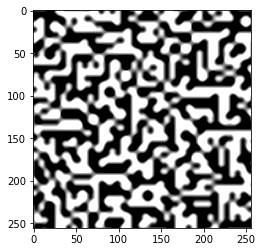

In [51]:
import matplotlib.pyplot as plt

amp = [1,3,5,7]
freq = [1,2,4]

lin = np.linspace(0, 5, 256, endpoint=False)
x, y = np.meshgrid(lin, lin)  # FIX3: I thought I had to invert x and y here but it was a mistake

for a in amp:
    for f in freq:
        noise = a * perlin(f * x, f * y)
        plt.imshow(noise, vmin=-1, vmax=1, cmap='gray')
        plt.imsave("../../../datasets/sample/perlin_python_" + str(a) + "_" + str(f) + ".jpg", noise, vmin=-1, vmax=1,
           cmap='gray')

### Load data used to sample

In [10]:
validation_data = []

validation_data.append(
    ('https://assets.fishersci.com/TFS-Assets/CCG/Chemical-Structures/chemical-structure-cas-67-64-1.jpg-650.jpg', 0))
validation_data.append(('https://i.pinimg.com/736x/3f/26/21/3f2621fa39b9ed4706ba1edba07d61c5.jpg', 0))
validation_data.append((torch.rand(1, 3, 256, 256), 2))
validation_data.append((torch.rand(1, 3, 256, 256), 2))
validation_data.append((
                       "https://img.myloview.es/posters/checkered-chequered-squares-pattern-and-background-chessboard-chess-checkerboard-texture-pattern-simple-and-basic-monochrome-pepita-alternating-squares-backdrop-400-225411586.jpg",
                       0))
validation_data.append(("../../../datasets/sample/perlin_python_1_1.jpg", 1))
validation_data.append(("../../../datasets/sample/perlin_python_1_2.jpg", 1))
validation_data.append(("../../../datasets/sample/perlin_python_1_4.jpg", 1))
validation_data.append(("../../../datasets/sample/perlin_python_3_1.jpg", 1))
validation_data.append(("../../../datasets/sample/perlin_python_3_2.jpg", 1))
validation_data.append(("../../../datasets/sample/perlin_python_3_4.jpg", 1))
validation_data.append(("../../../datasets/sample/perlin_python_5_1.jpg", 1))
validation_data.append(("../../../datasets/sample/perlin_python_5_2.jpg", 1))
validation_data.append(("../../../datasets/sample/perlin_python_5_4.jpg", 1))
validation_data.append(("../../../datasets/sample/perlin_python_7_1.jpg", 1))
validation_data.append(("../../../datasets/sample/perlin_python_7_2.jpg", 1))
validation_data.append(("../../../datasets/sample/perlin_python_7_4.jpg", 1))
validation_data.append(("../../../datasets/sample/turbulence.jpg", 1))
validation_data.append(("../../../datasets/sample/30.jpg", 1))
validation_data.append(("../../../datasets/sample/31.jpg", 1))
validation_data.append(("../../../datasets/sample/32.jpg", 1))
validation_data.append(("../../../datasets/sample/33.jpg", 1))
validation_data.append(("../../../datasets/sample/34.jpg", 1))

#### reconstruction_pipeline() experiments


In [ ]:
path = "../validation/aug/"
os.makedirs(path, exist_ok=True)
img = reconstruction_pipeline(models, validation_data, titles, size=192)
img.save(path+"aug1.jpg")

In [7]:
path = "../validation/aug2/"
os.makedirs(path, exist_ok=True)
img = reconstruction_pipeline(models2, validation_data, titles2, size=192)
img.save(path+"aug2.jpg")

Unsqueezed: torch.Size([1, 3, 192, 192])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
Unsqueezed: torch.Size([1, 3, 192, 192])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])


In [55]:
path = "../validation/aug3/"
os.makedirs(path, exist_ok=True)
img = reconstruction_pipeline(models3, validation_data, titles3, size=192)
img.save(path+"aug3.jpg")

Unsqueezed: torch.Size([1, 3, 192, 192])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
Unsqueezed: torch.Size([1, 3, 192, 192])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([12, 12])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])


In [56]:
path = "../validation/combined256/"
os.makedirs(path, exist_ok=True)
img = reconstruction_pipeline(combined256, validation_data, titles_combined256, size=256)
img.save(path+"combined256.jpg")

Unsqueezed: torch.Size([1, 3, 256, 256])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
Unsqueezed: torch.Size([1, 3, 256, 256])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])


In [57]:
path = "../validation/256/aug2/"
os.makedirs(path, exist_ok=True)
img = reconstruction_pipeline(models_256aug2, validation_data, titles_256aug2, size=256)
img.save(path+"aug2.jpg")

Unsqueezed: torch.Size([1, 3, 256, 256])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
Unsqueezed: torch.Size([1, 3, 256, 256])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])


In [11]:
path = "../validation/256aug2prueba/"
os.makedirs(path, exist_ok=True)
img = reconstruction_pipeline(models_prueba, validation_data, titles_prueba, size=256)
img.save(path+"aug2prueba.jpg")

Unsqueezed: torch.Size([1, 3, 256, 256])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
Unsqueezed: torch.Size([1, 3, 256, 256])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
Unsqueezed: torch.Size([1, 3, 256, 256])
VQGAN --- VQM

### load data used to sample (only negative examples)

In [34]:
validation_neg = []

validation_neg.append(
    ('https://assets.fishersci.com/TFS-Assets/CCG/Chemical-Structures/chemical-structure-cas-67-64-1.jpg-650.jpg', 0))
validation_neg.append(('https://i.pinimg.com/736x/3f/26/21/3f2621fa39b9ed4706ba1edba07d61c5.jpg', 0))
validation_neg.append((torch.rand(1, 3, 256, 256), 2))
validation_neg.append((torch.rand(1, 3, 256, 256), 2))
validation_neg.append((
                       "https://img.myloview.es/posters/checkered-chequered-squares-pattern-and-background-chessboard-chess-checkerboard-texture-pattern-simple-and-basic-monochrome-pepita-alternating-squares-backdrop-400-225411586.jpg",
                       0))
validation_neg.append(("../../../datasets/sample/perlin_python_1_1.jpg", 1))
validation_neg.append(("../../../datasets/sample/perlin_python_1_2.jpg", 1))
validation_neg.append(("../../../datasets/sample/perlin_python_1_4.jpg", 1))
validation_neg.append(("../../../datasets/sample/perlin_python_3_1.jpg", 1))
validation_neg.append(("../../../datasets/sample/perlin_python_3_2.jpg", 1))
validation_neg.append(("../../../datasets/sample/perlin_python_3_4.jpg", 1))
validation_neg.append(("../../../datasets/sample/perlin_python_5_1.jpg", 1))
validation_neg.append(("../../../datasets/sample/perlin_python_5_2.jpg", 1))
validation_neg.append(("../../../datasets/sample/perlin_python_5_4.jpg", 1))
validation_neg.append(("../../../datasets/sample/perlin_python_7_1.jpg", 1))
validation_neg.append(("../../../datasets/sample/perlin_python_7_2.jpg", 1))
validation_neg.append(("../../../datasets/sample/perlin_python_7_4.jpg", 1))
validation_neg.append(("../../../datasets/sample/turbulence.jpg", 1))
validation_neg.append(("../../../datasets/sample/negative/236.jpg", 1))
validation_neg.append(("../../../datasets/sample/negative/299.jpg", 1))
validation_neg.append(("../../../datasets/sample/negative/371.jpg", 1))
validation_neg.append(("../../../datasets/sample/negative/388.jpg", 1))
validation_neg.append(("../../../datasets/sample/cocacola.jpg", 1))

#### reconstruction_pipeline() experiments

In [35]:
path = "../validation/negative256/"
os.makedirs(path, exist_ok=True)
img = reconstruction_pipeline(models_negative256, validation_neg, titles_negative256, size=256)
img.save(path+"negative256.jpg")

Unsqueezed: torch.Size([1, 3, 256, 256])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
Unsqueezed: torch.Size([1, 3, 256, 256])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])


In [ ]:
path = "../validation/negative256/aug2/"
os.makedirs(path, exist_ok=True)
img = reconstruction_pipeline(models_negative256_aug2, validation_neg, titles_negative256_aug2, size=256)
img.save(path+"aug2.jpg")

Unsqueezed: torch.Size([1, 3, 256, 256])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
Unsqueezed: torch.Size([1, 3, 256, 256])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
VQGAN --- VQModel: latent shape: torch.Size([16, 16])
